# Investigating the NICS FireArms Background Checks Data
###### Itunuoluwa Olowoye
###### 30th May, 2022

## Table of Contents
* [Introduction](#Introduction)
* [Problem Statement](#Problem-Statement)
* [Data Wrangling](#Data-Wrangling)
    * [Data assessment](#Data-assessment)
    * [Data cleaning](#Data-cleaning)
        * [Cleaning firearms dataset](#Cleaning-firearms-dataset)
        * [Cleaning census dataset](#Cleaning-census-dataset)
* [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
    * [Growth of firearm background checks in states over the years](#Growth-of-firearm-background-checks-in-states-over-the-years)
    * [Type of background checks for states with significant background checks](#Type-of-background-checks-for-states-with-significant-background-checks)
    * [States with high firearm per capita](#States-with-high-firearm-per-capita)
    * [Age distribution of states with high gun per capita](#Age-distribution-of-states-with-high-gun-per-capita)
* [Conclusions and Limitations](#Conclusions-and-Limitations)

### Introduction
On the 24th of May, 2022, an 18-year-old gunman shot and killed 21 people in an [elementary school in Texas](https://www.aljazeera.com/news/2022/5/25/texas-shooting-what-where-and-who). It is sad and horrible news and it raises the question of how that teenager was able to get access to a gun. It could be owned by someone he knows or by him, since he is of legal age. Either ways, it is, unfortunately, quite fitting to analyse information on background checks conducted for gun sales in America.

This dataset is from the FBI's National Instant Criminal Background Check System(NICS). It is used by gun shops to determine whether prospective buyers are eligible to buy firearms or not. 
**It is important to note that these numbers do not represent the number of firearms sold due to varying state laws and purchase scenarios.**

However, this dataset has generally been used as an acceptable proxy to determine firearm puchases.
The dataset contains background checks recorded from 1998 to 2017 in the different states in America. The month, state (including U.S. territories), and checks are recorded in columns. These include checks requested (column name in brackets):
* To issue a firearm permit or transfer (permit, permit_recheck, handgun, long_gun, other, multiple, admin)
* Before pledging or pawning a firearm (prepawn_handgun, prepawn_long_gun, prepawn_other)
* To regain possession of a firearm (redemption_handgun, redemption_long_gun, redemption_other)
* For returning firearms to previous owners (returned_handgun, returned_long_gun, returned_other)
* For loaning or renting a firearm (rentals_handgun, rentals_long_gun, rentals_other)
* To buy a firearm from an unlicensed seller (private_sale_handgun, private_sale_long_gun, private_sale_other, return_to_seller_handgun, return_to_seller_long_gun, return_to_seller_other)
The total number of checks is also recorded in a column named 'totals'.

> Other refers to firearms that are not handguns or long guns. Multiple refers to a single background check for more than one type of firearm. Admin refers to administrative checks for other authorized uses of the NICS.

The full data description is found in the FBI file repository [here](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view).

This dataset was supplemented with [population data from the 2016 U.S. census](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv&sa=D&source=editors&ust=1653921451986105&usg=AOvVaw1MavANZwewqQN29G-X61Ub) which contains the population of the U.S states (excluding U.S. territories) in 2016.

### Problem Statement
This analysis will attempt to answer three questions.
1. Which state has had the highest growth in firearm purchases over the years?
2. What is the proportion of the different types of background checks within each state?
3. Which states have the highest firearm per capita?
4. What is the population distribution of these states identified in question (3)?

## Data Wrangling
### Data assessment
In this section, the important packages (pandas, numpy, matplotlib, and seaborn) are imported and run. The datasets are also loaded and inspected. The NICS data was originally available as an .xlsx file and was saved again as a csv file before importing into python. These datasets were also saved on Google Drive, rather than on a local disk, for accessibility to all users.

In [1]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The firearms dataset is assessed first.

In [2]:
# load datasets from csv files into dataframes
firearm_url = 'https://drive.google.com/file/d/1zyJmkhjpND_yb3eGflSDs2EGjmSwWFam/view?usp=sharing'
firearm_path = 'https://drive.google.com/uc?export=download&id='+firearm_url.split('/')[-2]
firearm_df = pd.read_csv(firearm_path)

census_url = 'https://drive.google.com/file/d/1PDAYgeVSAOsfPO4jcPwsCr70zLBBBc-4/view?usp=sharing'
census_path = 'https://drive.google.com/uc?export=download&id='+census_url.split('/')[-2]
census_df = pd.read_csv(census_path)

In [3]:
# inspect the firearm dataframe to check if import was successful
firearm_df.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [4]:
# concise summary of the firearm dataframe
firearm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
# descriptive statistics of the firearm dataframe
firearm_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


The census dataset is assessed next.

In [6]:
# inspect the census dataframe to see if import was successful
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


### Data cleaning
#### Cleaning firearms dataset
There are null values in the firearms dataset. It is assumed that the null values mean that those background checks were either not run or recorded, hence, zero. The *null* values in all columns were then replaced with the number **zero**.

The `month` column was also inputted as an object(string). It was converted to a datetime format for efficient data analysis.

The dataset was also checked for duplicate values.

In [7]:
# fill null values in all columns with a value of zero
firearm_df.fillna(0, inplace = True)

In [8]:
#confirm that there are no longer any null values
firearm_df.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [9]:
# convert month column to datetime format
firearm_df['month'] = pd.to_datetime(firearm_df['month'])

In [10]:
#confirm datatype conversion
firearm_df['month'].dtypes

dtype('<M8[ns]')

In [11]:
# you can also check the new summary of the dataframe
firearm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  float64       
 3   permit_recheck             12485 non-null  float64       
 4   handgun                    12485 non-null  float64       
 5   long_gun                   12485 non-null  float64       
 6   other                      12485 non-null  float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12485 non-null  float64       
 9   prepawn_handgun            12485 non-null  float64       
 10  prepawn_long_gun           12485 non-null  float64       
 11  prepawn_other              12485 non-null  float64       
 12  rede

In [12]:
# check for duplicate values
sum(firearm_df.duplicated())

0

#### Cleaning census dataset
Upon inspecting the census dataset earlier, it was noticed that the variables (columns) are the states while the observations (rows) are the population data. It should be the reverse. The observations should be the data for each state, for easier analysis. It will also aid comparison with the firearms dataset.

The dataset was transposed accordingly and checked for null values, duplicate values, and inconsistent data types.

In [13]:
# transpose census dataframe
transposed_census_df = census_df.T
transposed_census_df.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# make the first row the header row
transposed_census_df.columns = transposed_census_df.iloc[0]
transposed_census_df.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# check summary statistics
transposed_census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Fact to Wyoming
Data columns (total 85 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                            51 non-null     object
 1   Population estimates base, April 1, 2010,  (V2016)                                      51 non-null     object
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   51 non-null     object
 3   Population, Census, April 1, 2010                                                       51 non-null     object
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  51 non-null     object
 5   Persons under 5 years, percent, April 1, 2010                                

In [16]:
# Inspecting the data frame, the 66th column and beyond need to be deleted
# drop irrelevant columns
transposed_census_df.drop(transposed_census_df.iloc[:, 66:85], inplace=True, axis=1)
transposed_census_df.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""


In [17]:
# Inspecting the data frame, the first two rows after the header also need to be deleted
# drop irrelevant rows
transposed_census_df = transposed_census_df.drop('Fact')
transposed_census_df = transposed_census_df.drop('Fact Note')
transposed_census_df.head(2)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""


In [18]:
#check new summary
transposed_census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 3   Population, Census, April 1, 2010                                                       50 non-null     object
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     object
 5   Persons under 5 years, percent, April 1, 2010                             

For the purpose of this analysis, we will use the recent population data which is from 2016. Hence, we will drop other columns that do not contain 2016 data.

In [19]:
# drop data that is not from 2016
census2016 = transposed_census_df.drop(transposed_census_df.iloc[:, 30:65], axis=1)

In [20]:
census2016 = census2016.drop(census2016.iloc[:, [3,5,7,9,11,20,21,23,24,25,26,27,28]], axis=1)
census2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 17 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                           50 non-null     object
 1   Population estimates base, April 1, 2010,  (V2016)                                     50 non-null     object
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  50 non-null     object
 3   Persons under 5 years, percent, July 1, 2016,  (V2016)                                 50 non-null     object
 4   Persons under 18 years, percent, July 1, 2016,  (V2016)                                50 non-null     object
 5   Persons 65 years and over, percent,  July 1, 2016,  (V2016)                      

In [21]:
# check for null values
census2016.isnull().sum()

Fact
Population estimates, July 1, 2016,  (V2016)                                             0
Population estimates base, April 1, 2010,  (V2016)                                       0
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    0
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   0
Persons under 18 years, percent, July 1, 2016,  (V2016)                                  0
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                              0
Female persons, percent,  July 1, 2016,  (V2016)                                         0
White alone, percent, July 1, 2016,  (V2016)                                             0
Black or African American alone, percent, July 1, 2016,  (V2016)                         0
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)                 0
Asian alone, percent, July 1, 2016,  (V2016)                                         

In [22]:
#check for duplicate values
sum(census2016.duplicated())

0

In [23]:
#check data
census2016.head(1)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","15,001"


Although all data inputs are numeric, they were recorded as strings. They need to be change to numeric format - either integer (int) or decimal (float). However, this can only be done after all non-numeric data types, that is, the commas and percentage signs, are removed.

In [24]:
# remove all commas
for col in census2016:
    census2016[col] = census2016[col].str.replace(',', '')
census2016.head(1)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,4863300,4780131,1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,2230185,15001


In [25]:
# remove all percentage signs
for col in census2016:
    census2016[col] = census2016[col].str.replace('%', '')
census2016.head(1)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,4863300,4780131,1.70,6.00,22.60,16.10,51.60,69.30,26.80,0.70,1.40,0.10,1.60,4.20,65.80,2230185,15001


In [26]:
# replace Z with point zero
for col in census2016:
    census2016[col] = census2016[col].str.replace('Z', '.0')

In [27]:
# change whole numbers to integers
# the astype function seems to revert when used on ilocs
# the first code with a column name is used to reverse that

census2016['Population estimates, July 1, 2016,  (V2016)'] = census2016['Population estimates, July 1, 2016,  (V2016)'].astype(int)
census2016.iloc[:,0:2] = census2016.iloc[:,0:2].astype(int)
census2016.iloc[:,15:17] = census2016.iloc[:,15:17].astype(int)
census2016.dtypes

Fact
Population estimates, July 1, 2016,  (V2016)                                              int32
Population estimates base, April 1, 2010,  (V2016)                                        int32
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                  object
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                              object
Female persons, percent,  July 1, 2016,  (V2016)                                         object
White alone, percent, July 1, 2016,  (V2016)                                             object
Black or African American alone, percent, July 1, 2016,  (V2016)                         object
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)                 object
Asian alone, percent, July 1, 2016,

In [28]:
# now change percentages to float
census2016['White alone, percent, July 1, 2016,  (V2016)'] = census2016['White alone, percent, July 1, 2016,  (V2016)'].astype(float)
census2016.iloc[:,2:15] = census2016.iloc[:,2:15].astype(float)

In [29]:
# confirm new datatypes in census data
census2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 17 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                           50 non-null     int32  
 1   Population estimates base, April 1, 2010,  (V2016)                                     50 non-null     int32  
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  50 non-null     float64
 3   Persons under 5 years, percent, July 1, 2016,  (V2016)                                 50 non-null     float64
 4   Persons under 18 years, percent, July 1, 2016,  (V2016)                                50 non-null     float64
 5   Persons 65 years and over, percent,  July 1, 2016,  (V2016)               

In [30]:
# reset index so that states are not indexed columns
census2016.reset_index(inplace=True)
census2016.head(1)

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
0,Alabama,4863300,4780131,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001


In [31]:
# remove index name
census2016 = census2016.rename_axis(None, axis = 1)
census2016.head(1)

,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
0,Alabama,4863300,4780131,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001


In [32]:
# rename state columns
census2016.rename(columns = {'index':'state'}, inplace=True)
census2016.head(1)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
0,Alabama,4863300,4780131,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001


In [33]:
#Make a copy of this dataframe with an easier and shorter name
pop_df = census2016.copy()

Now, the firearms dataset `firearms_df` and census dataset `pop_df` are ready for analysis.

## Exploratory Data Analysis
Now that the firearms `firearms_df` and census `pop_df` datasets have been wrangled, they are ready for analysis. This analysis will find insights related to the [problem statement](#Problem-Statement) listed earlier in this report.
### Growth of firearm background checks in states over the years
The total (`totals` column) amount of background check for each recorded month from 1998 to 2017 is visualized for each state and U.S. territory. These plots will help identify the states with high growth rate in background checks.

In [34]:
# group the dataset by state and month and derive the totals for each entry.
grouped_fa = firearm_df.groupby(['state','month']).sum()

There are 55 states (including U.S. territories) in this dataset. To avoid clumsy visualization, the grouped dataframe was split into five dataframes each with 11 states.

In [35]:
# First eleven states
first_split = grouped_fa.loc["Alabama":"Georgia"]

# Second eleven states
second_split = grouped_fa.loc["Guam":"Mariana Islands"]

# Third eleven states
third_split = grouped_fa.loc["Maryland":"New Jersey"]

# Fourth eleven states
fourth_split = grouped_fa.loc["New Mexico":"South Carolina"]

# Fifth eleven states
fifth_split = grouped_fa.loc["South Dakota":"Wyoming"]

The five subset dataframes each with eleven states were plotted on linegraphs with equal dimensions and y-axis range for equal comparison between graphs.
To create the plots, a user-defined function named `line_plot` was created. This function was called to create the line plots for the subsets.

In [44]:
# create a user-defined function that can be used to plot the five subsets
def line_plot(subset):
    fig, ax = plt.subplots()
    sns.lineplot(ax=ax, data=subset,
                 x=subset.index.get_level_values('month'),
                 y=subset['totals'],
                 hue=subset.index.get_level_values('state'),
                 palette='colorblind',
                 linewidth=3.0)
    # set y-axis limits
    ax.set_ylim(0,600000)
    #set plot size, title, and legend position
    plt.gcf().set_size_inches(15,4)
    plt.title('Background check trends from 1998 to 2017 in America')
    plt.legend(loc='upper left')

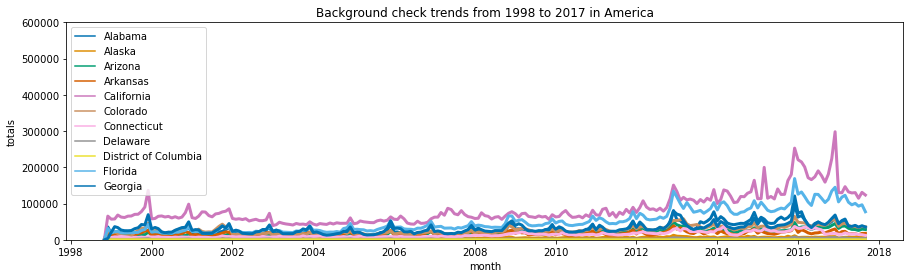

In [45]:
# line plot for the first subset
line_plot(first_split)

The states with high growth rates are states that show significant rise compared to other states and these are the states of focus.
> In California, total background checks first increased sharply in 2000, declined and stayed relatively steady for twelve years until 2013 when it rose again. It declined going into 2014, rose in 2015, and reached its peak mid-2016 and mid-2017. It dropped again towards the end of 2017. From the linetrend, it is possible that it continues to decline into 2018.
>
> In Florida, total background checks rose in 2013, and continued to rise and fall in the following years. It reached its peak in 2016. From the linetrend, it may decline into 2018.

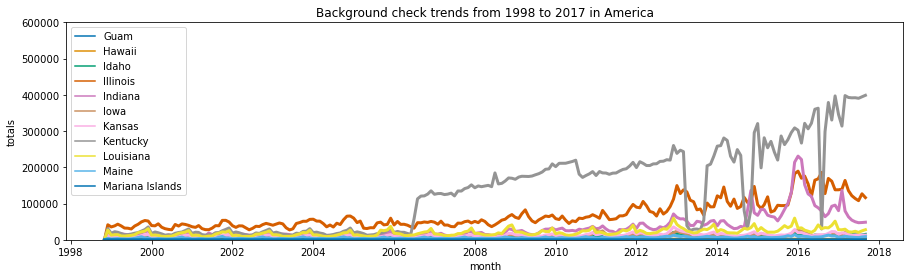

In [46]:
# line plot for the second subset
line_plot(second_split)

> Kentucky has the highest increase in total background checks, well above the other states. This may be **inferred** to mean that *Kentucky has the highest firearms purchases in America*. Although, there were huge drops in background checks going into 2014, 2015, and 2017, the general trend is rising and may continue to rise into 2018. This high rate of firearm transactions can be attributed to the laxity of [gun laws in Kentucky](https://en.wikipedia.org/wiki/Gun_laws_in_Kentucky).
>
> Illinois shows a gradual increase in total background checks from 2013 to 2017 and may continue to increase into 2018. Indiana is generally low, however, there was a marked increase in 2016.

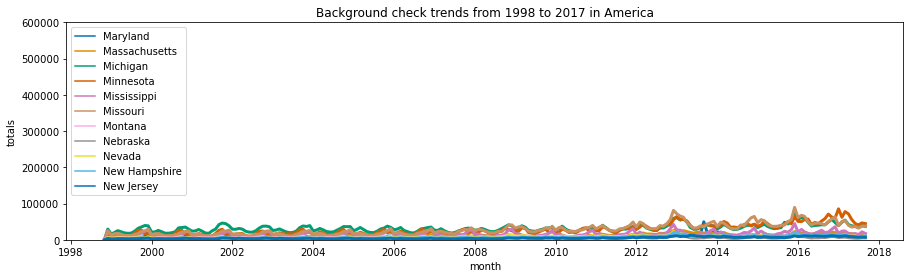

In [47]:
# line plot for the third subset
line_plot(third_split)

> There is no significant growth rate in this graph above. Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, and New Jersey all have a low and steady growth rate.

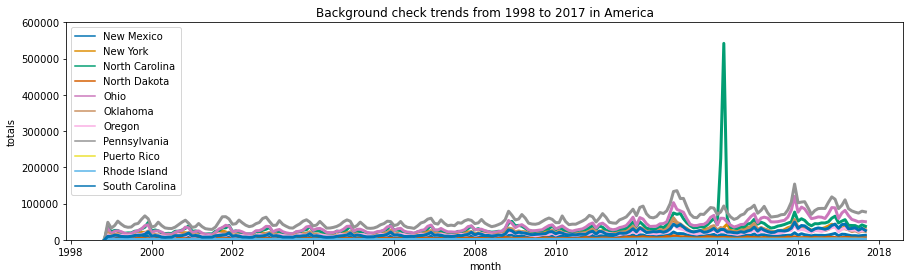

In [48]:
# line plot for the fourth subset
line_plot(fourth_split)

> North Carolina is also generally low. Howver, there was a marked increase in 2014 when background checks rose to above 500,000 and suddenly declined afterwards. This will require further analysis and journalism to uncover why that happened.

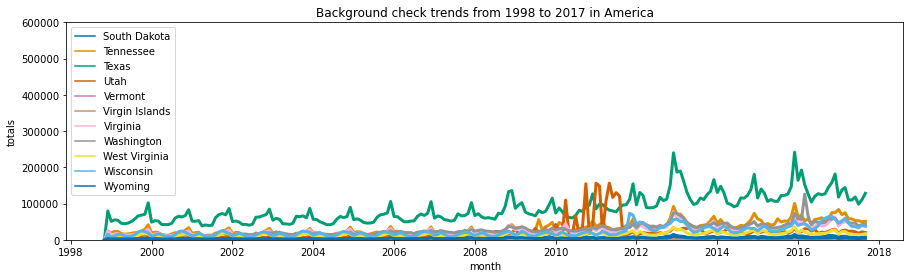

In [49]:
# line plot for the fifth and final subset
line_plot(fifth_split)

> **In Texas, there is a recurring trend in total background checks. In the *second quarter* of every year from 1998 to 2017, there is an increase in total background checks. It is possible that this trend continues into 2018 and beyond.
[Wikipedia](https://en.wikipedia.org/wiki/List_of_shootings_in_Texas) lists out the notable homicides in Texas from 1963 to present day. Between 1998 to present day, there have been 19 notable homicide cases in Texas and 11 of those cases occurred in the second quarter of the year. This implies a correlation between increase in background checks (gun purchases, by proxy) and notable shootings at Texas in the second quarter of the year. However, further research and analysis is needed to understand the root cause of this trend.**
>
> In Utah, the trend is generally low, however, there was an increase from mid-2010 to the beginning of 2012 that may be worth looking into.

### Type of background checks for states with significant background checks
The background checks carried out have been sub-divided based on the type of transaction: issuance, redemption, rental, etc). The total proportion of these different types of checks in California, Florida, Kentucky, Illinois, Indiana, North Carolina, Texas, and Utah are estimated and plotted on a stacked bar plot.

*Under issuance checks, there are administrative checks `admin` for other authorized uses of the NICS other than the issuance of firearms. This column will be excluded from the analysis*

In [40]:
#firearm summary
firearm_df.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


The total values of each of issuance, prepawn, redemption, returned, rental, and private sale firearm background checks are calculated.

In [41]:
# total issuance checks (excluding admin)
issuance = firearm_df.permit + firearm_df.permit_recheck + firearm_df.handgun + firearm_df.long_gun + firearm_df.other + firearm_df.multiple

# total prepawn checks
prepawn = firearm_df.prepawn_handgun + firearm_df.prepawn_long_gun + firearm_df.prepawn_other

# total redemption checks
redemption = firearm_df.redemption_handgun + firearm_df.redemption_long_gun + firearm_df.redemption_other

# total checks for returned firearms
returned = firearm_df.returned_handgun + firearm_df.returned_long_gun + firearm_df.returned_other

# total rental checks
rentals = firearm_df.rentals_handgun + firearm_df.rentals_long_gun

# private sale checks
private_sales = firearm_df.private_sale_handgun + firearm_df.private_sale_long_gun + firearm_df.private_sale_other + firearm_df.return_to_seller_handgun + firearm_df.return_to_seller_long_gun + firearm_df.return_to_seller_other

The dataset is copied into another dataframe to avoid changing the structure of the original dataset. The calculated fields are added to the copy of the dataframe.

In [42]:
# make a copy of firearms data for the proportions analysis
# add the new fields to the copied data as columns
proportions = firearm_df.copy()
proportions['issuance'] = issuance
proportions['prepawn'] = prepawn
proportions['redemption'] = redemption
proportions['returned'] = returned
proportions['rentals'] = rentals
proportions['private_sales'] = private_sales

In [43]:
# confirm the addition of these new columns
proportions.shape

(12485, 33)

This dataframe is grouped by state and the sum of all values is aggregated. This is done to add the values of background checks together for every state.

In [44]:
#group the dataframe by state
grouped_prop = proportions.groupby('state').sum()

The question intends to further the analysis of the previous question above. Of the states with high background check growth rate, we want to find out the proportion of each type of background check.
First, the observations for the states of interest are selected into a new dataframe.

In [45]:
#select the states of interest
highcheck_states = grouped_prop.loc[['California','Florida','Kentucky','Illinois','Indiana','North Carolina','Texas','Utah']]

In [46]:
#inspect rows and columns
highcheck_states.head(1)

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,issuance,prepawn,redemption,returned,rentals,private_sales
state,,,,,,,,,,,,,,,,,,,,,
California,6530543.0,0.0,5910880.0,5936770.0,342635.0,207864,16680.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19014063,18928692.0,0.0,68691.0,0.0,0.0,0.0


This new dataframe is sorted in ascending order for ease of visualization when the data is plotted.

In [47]:
# sort dataframe in ascending order
highcheck_states = highcheck_states.sort_values(by=['totals'])

We create a bar plot of these states that shows the proportion of each type of background checl.

Text(0.5, 1.0, 'Type of checks in states with high growth rate of background checks')

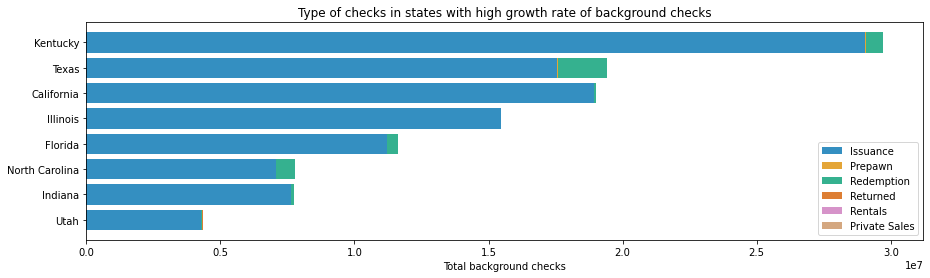

In [48]:
#define plot size
plt.figure(figsize=(15,4))

#the states are the index and are the x-axis
x = highcheck_states.index

#define all y-axes
y1 = highcheck_states.issuance
y2 = highcheck_states.prepawn
y3 = highcheck_states.redemption
y4 = highcheck_states.returned
y5 = highcheck_states.rentals
y6 = highcheck_states.private_sales

#plot stacked horizontal bar plots
plt.barh(x, y1, color='#0173b2', label='Issuance', alpha=0.8)
plt.barh(x, y2, left=y1, color='#de8f05', label='Prepawn', alpha=0.8)
plt.barh(x, y3, left=y1+y2, color='#029e73', label='Redemption', alpha=0.8)
plt.barh(x, y4, left=y1+y2+y3, color='#d55e00', label='Returned', alpha=0.8)
plt.barh(x, y5, left=y1+y2+y3+y4, color='#cc78bc', label='Rentals', alpha=0.8)
plt.barh(x, y6, left=y1+y2+y3+y4+y5, color='#ca9161', label='Private Sales', alpha=0.8)
plt.legend()
plt.xlabel('Total background checks')
plt.title('Type of checks in states with high growth rate of background checks')

> From the plot above, we see that the **top three** states with high total background checks are:
> 1. Kentucky
> 2. Texas
> 3. California
>
> We also see that **most background checks are done for the issuance of firearm permits and transfers**. It may then be inferred, by proxy, that firearm purchases are highest in Kentucky, Texas, and California, accordingly. It may also be inferred that most transactions are for the issuance of firearm permits or transfers.

### States with high firearm per capita
For this analysis, data from the firearms and census dataset were merged and used to calculate the total firearm per capita for each state. States with firearm per capita higher than the mean are noted and the population distributions by age are compared to find trends, if any.

In [49]:
# select population and age distribution from census data
pop_new = pop_df.iloc[:,[0,1,4,5,6]]
pop_new.head(2)

,state,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)"
0,Alabama,4863300,6.0,22.6,16.1
1,Alaska,741894,7.3,25.2,10.4


From inspecting the data frame, age distributions in percentages are given for:
1. People under 5
2. People under 18
3. People over 65

As such, the percentage of people aged 18 to 65 needs to be calculated. This percentage was calculated and added to the dataframe.

In [50]:
# add new column for percentage of people between 18 and 65 years old
under5 = pop_new.iloc[:,2]
under18 = pop_new.iloc[:,3]
over65 = pop_new.iloc[:,4]
pop_new['Persons between 18 and 65 years, percent, July 1, 2016'] = 100-(under5+under18+over65)

# check dataframe dimensions
pop_new.shape

C:\Users\Itunuoluwa\anaconda3\envs\udacity_env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(50, 6)

The population data is grouped per state. The firearms data was then grouped by state so that both datasts can be compared and merged.
In grouping the firearms dataset by state, the `state` column becomes an index. This was changed back into a column by resetting the index.

In [51]:
# group firearms dataset by state
state_fa = firearm_df.groupby('state').sum()

# make state a column instead of index
state_fa.reset_index(inplace=True)

# check dataframe dimensions
state_fa.shape

(55, 26)

After creating the dataframe of firearms grouped by state, this dataframe was merged with the population data to create a dataframe with firearm background check and population data.

In [52]:
# merge firearm and census dataset using states in both datasets
merged_df = pd.merge(state_fa, pop_new, how="inner",
                     on='state')

# check dataframe dimensions
merged_df.shape

(50, 31)

This merged dataframe was used to calculate the firearm per capita. The `totals` column for total background checks is being used as a proxy for total firearm purchases. Therefore, the firearm per capita is calculated to be this `totals` column divided by the total population in the state.

In [53]:
# calculate firearm per capita
firearm_per_capita = merged_df['totals']/merged_df['Population estimates, July 1, 2016,  (V2016)']

The firearm per capita field was added to the merged dataframe.

In [54]:
# make firearm_per_capita a column in the merged dataframe
merged_df['firearm_per_capita'] = firearm_per_capita

The summary statistics of this firearm per capita was generated. States with high firearm per capita are states with either the mean value or above the mean value of firearm per capita.

In [55]:
# check the mean of the firearm_per_capita
merged_df['firearm_per_capita'].describe()

count    50.000000
mean      1.030104
std       0.908643
min       0.128107
25%       0.697868
50%       0.909571
75%       1.181876
max       6.707822
Name: firearm_per_capita, dtype: float64

States with high firearm per capita were selected and put in another dataframe.

In [56]:
# select states with firearm per capita equal to or higher than the mean
high_capita = merged_df.query('firearm_per_capita >= 1.030104')
high_capita.shape

(20, 32)

The resulting dataframe was sorted by firearm per capita in ascending order to aid visualization when plotting.

In [57]:
# sort dataframe in ascending order
high_capita = high_capita.sort_values(by=['firearm_per_capita'])

A bar plot of the firearm per capita of each state with high gun per capita was created.

Text(0.5, 1.0, 'States with high firearm per capita')

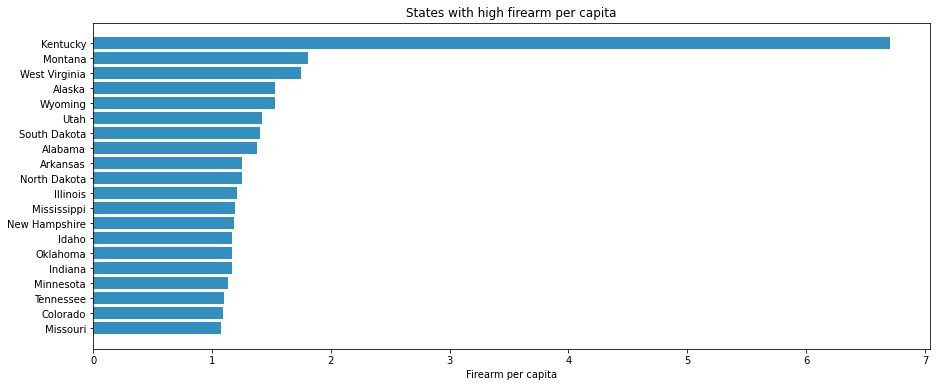

In [58]:
# bar plot of firearm per capita for each state with high gun per capita
plt.figure(figsize=(15,6))
x = high_capita['state']
y = high_capita['firearm_per_capita']
plt.barh(x, y, color='#0173b2', alpha=0.8)
plt.xlabel('Firearm per capita')
plt.title('States with high firearm per capita')

> From the plot, **Kentucky has the highest firearm per capita**, significantly higher than the rest. Again, Kentucky has little to no firearm retriction laws and this could be why firearm transactions and gun per capita are very high.
### Age distribution of states with high gun per capita
The population distributions by age are compared to find trends, if any. The age distribution columns are rearranged so that the distributions can be seen sequentially from youngest to oldest.

In [59]:
# select the columns for state and age distribution from states with high gu per capita
pop_dist = high_capita.iloc[:, [0,27,28,29,30]]

#tarrange age columns sequetially
new_cols = ["state",
            "Persons under 5 years, percent, July 1, 2016,  (V2016)",
            "Persons under 18 years, percent, July 1, 2016,  (V2016)",
            "Persons between 18 and 65 years, percent, July 1, 2016",
            "Persons 65 years and over, percent,  July 1, 2016,  (V2016)"]
pop_dist=pop_dist.reindex(columns=new_cols)

#make the state column the index
pop_dist = pop_dist.set_index("state")

#inspect the dataframe> 
pop_dist.head(1)

,"Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons between 18 and 65 years, percent, July 1, 2016","Persons 65 years and over, percent, July 1, 2016, (V2016)"
state,,,,
Missouri,6.1,22.8,55.0,16.1


A bar plot of the age distributions in these states with high gun per capita was created to visualize age distributions.

Text(0.5, 1.0, 'Age distribution in states with high gun per capita')

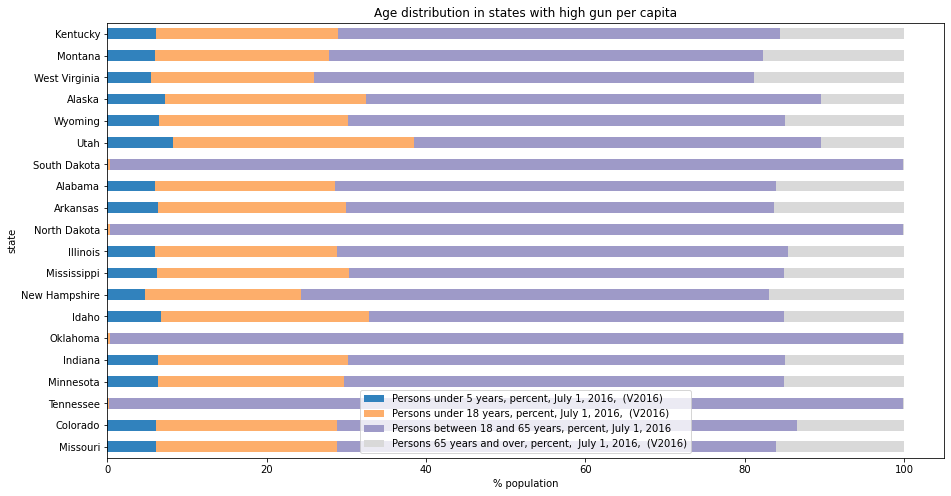

In [60]:
# bar plot of the age distribution
pop_dist.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab20c',
                    figsize=(15, 8))

plt.legend(loc="best")
plt.xlabel("% population")
plt.title('Age distribution in states with high gun per capita')

> From the plot, the states have **similar age distributions** (a high percentage of people aged 18 to 65 years) except South Dakota, North Dakota, Oklahoma, and Tennessee.

## Conclusions and Limitations
The analysis of these datasets was done to identify states with high growth rate in NICS background checks, high total background checks, and high firearm per capita. The analysis also aimed to show the most frequent background check and the age distribution of people in states with high firearm per capita. This analysis has provided answers to the aforementioned.

From the analysis, states with high growth rates in background checks include `California`, `Florida`, `Kentucky`, `Illinois`, `Indiana`, `North Carolina`, `Texas`, and `Utah`. In Texas, there is an increase in total background checks every second quarter of the year. This correlates with when most notable shootings have been recorded in Texas. 

The total background checks from 1998 to 2017 are highest in Kentucky, Texas, and California respectively.  Most background checks were for the issuance of a firearm permit or transfer. Firearm purchases, subsequently, **may** be highest in these states. 

Kentucky also has the highest firearm per capita. Kentucky has the highest growth rate, highest total background checks from 1998 to 2017, and highest firearm per capita. This may be related to the laxity of firearm laws in the state as recorded [here](https://en.wikipedia.org/wiki/Gun_laws_in_Kentucky).

States with high firearm per capita generally have similar age distributions. They have a high percentage of people aged 18 to 65. 

It is **important to note that** although this firearm background check dataset has been used as a proxy to infer firearm purchases, there is no one-to-one correlation between background checks and firearm purchases. This is because sales depend on state laws and different purchase scenarios.

It is also important to note that the predictions made on the future trends of growth rate of background checks duwing EDA are surface-level and require a proper predictive analysis for confirmation or otherwise.

Also, further research and analysis is needed to find the root cause of the correlation between increase in background checks and notable shooting incidents in Texas especially because **correlation does not equal causation**.

While states with high firearm per capita generally have similar distributions of people aged 18 to 65, this is a very wide range and there is a need for smaller sub-divisions for more accurate demographic distribution.